In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.RNN import GRU
from genrecog.tools.trainer import RNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model = GRU(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

GRU(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (glu): GRU(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
trainer = RNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 29.97
Training loss 1.9637
Validation accuracy 19.00
Validation loss 2.2794
============================== EPOCH 2 =================================
Training accuracy 39.56
Training loss 1.7167
Validation accuracy 24.00
Validation loss 2.1233
============================== EPOCH 3 =================================
Training accuracy 41.19
Training loss 1.6492
Validation accuracy 37.00
Validation loss 1.9363
============================== EPOCH 4 =================================
Training accuracy 42.94
Training loss 1.5803
Validation accuracy 41.00
Validation loss 1.7401
============================== EPOCH 5 =================================
Training accuracy 45.78
Training loss 1.5172
Validation accuracy 35.75
Validation loss 1.7199
============================== EPOCH 6 =================================
Training accuracy 48.00
Training loss 1.4337
Validation accuracy 42.50
Validation loss 1.556

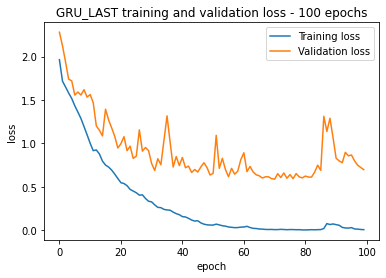

In [8]:
trainer.plot_loss("GRU_LAST training and validation loss - 100 epochs")

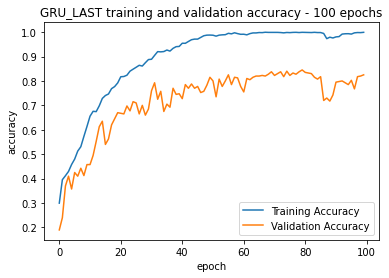

In [9]:
trainer.plot_accuracies("GRU_LAST training and validation accuracy - 100 epochs")

In [10]:
trainer.eval(test_dataloader)

(tensor([0, 2, 2, 6, 9, 2, 2, 4, 9, 4, 6, 5, 6, 2, 7, 0, 3, 1, 0, 8, 0, 2, 0, 1,
         5, 1, 0, 7, 7, 9, 9, 4, 0, 2, 6, 3, 4, 1, 8, 0, 3, 3, 7, 4, 7, 6, 2, 3,
         4, 0, 4, 2, 6, 8, 0, 0, 9, 0, 0, 3, 8, 0, 1, 5, 0, 8, 2, 9, 6, 3, 0, 9,
         4, 0, 0, 0, 2, 7, 6, 3, 8, 9, 6, 6, 5, 9, 2, 9, 3, 0, 3, 6, 3, 0, 4, 2,
         1, 6, 8, 5, 6, 2, 9, 8, 9, 2, 5, 9, 2, 9, 2, 5, 4, 7, 0, 9, 8, 9, 5, 5,
         1, 5, 7, 2, 3, 7, 5, 1, 2, 4, 0, 4, 5, 9, 7, 4, 2, 6, 7, 3, 4, 1, 5, 8,
         9, 3, 3, 5, 6, 1, 5, 8, 5, 9, 0, 5, 9, 0, 1, 0, 3, 6, 7, 6, 8, 9, 9, 4,
         9, 4, 2, 4, 0, 9, 6, 8, 0, 5, 1, 9, 1, 3, 8, 5, 1, 9, 7, 5, 7, 8, 7, 6,
         2, 3, 5, 8, 5, 8, 9, 7, 5, 1, 8, 4, 4, 0, 7, 8, 8, 3, 0, 8, 5, 3, 5, 7,
         9, 6, 4, 8, 8, 5, 3, 0, 0, 0, 4, 6, 8, 8, 8, 8, 7, 8, 6, 7, 3, 0, 2, 5,
         3, 0, 1, 9, 3, 5, 3, 6, 4, 5, 6, 6, 6, 3, 8, 6, 6, 9, 1, 5, 2, 7, 5, 4,
         6, 2, 4, 3, 9, 9, 8, 4, 3, 1, 5, 6, 5, 0, 6, 2, 6, 0, 5, 4, 8, 5, 2, 9,
         7, 9, 4, 7, 1, 6, 3

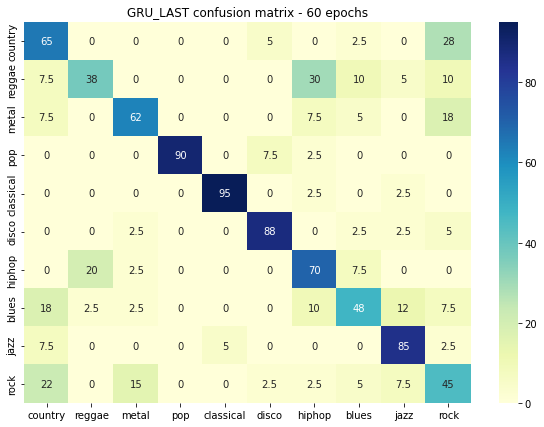

In [11]:
trainer.plot_confusion_matrix(test_dataloader, 'GRU_LAST confusion matrix - 60 epochs')

In [12]:
trainer.classification_report(test_dataloader);

              precision    recall  f1-score   support

     country       0.51      0.65      0.57        40
      reggae       0.62      0.38      0.47        40
       metal       0.74      0.62      0.68        40
         pop       1.00      0.90      0.95        40
   classical       0.95      0.95      0.95        40
       disco       0.85      0.88      0.86        40
      hiphop       0.56      0.70      0.62        40
       blues       0.59      0.47      0.53        40
        jazz       0.74      0.85      0.79        40
        rock       0.39      0.45      0.42        40

    accuracy                           0.69       400
   macro avg       0.70      0.68      0.68       400
weighted avg       0.70      0.69      0.68       400



In [13]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model_2 = GRU(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

GRU(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (glu): GRU(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
trainer_2 = RNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=60)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 29.62
Training loss 1.9437
Validation accuracy 15.00
Validation loss 2.2718
============================== EPOCH 2 =================================
Training accuracy 38.03
Training loss 1.7303
Validation accuracy 25.75
Validation loss 2.1425
============================== EPOCH 3 =================================
Training accuracy 41.34
Training loss 1.6527
Validation accuracy 31.00
Validation loss 2.0175
============================== EPOCH 4 =================================
Training accuracy 43.41
Training loss 1.5791
Validation accuracy 33.50
Validation loss 1.8397
============================== EPOCH 5 =================================
Training accuracy 45.97
Training loss 1.5164
Validation accuracy 39.25
Validation loss 1.7092
============================== EPOCH 6 =================================
Training accuracy 47.47
Training loss 1.4448
Validation accuracy 39.50
Validation loss 1.609

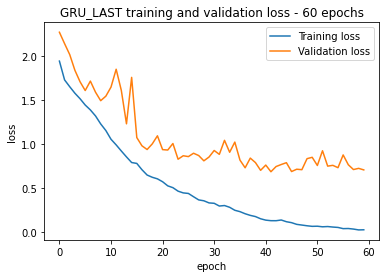

In [15]:
trainer_2.plot_loss("GRU_LAST training and validation loss - 60 epochs")

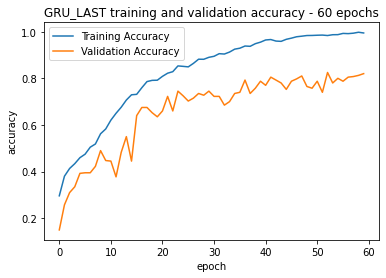

In [16]:
trainer_2.plot_accuracies("GRU_LAST training and validation accuracy - 60 epochs")

In [17]:
trainer_2.eval(test_dataloader)

(tensor([4, 4, 4, 5, 4, 8, 8, 6, 6, 4, 4, 0, 7, 6, 4, 4, 3, 4, 9, 7, 9, 8, 4, 9,
         6, 2, 9, 5, 4, 1, 4, 2, 2, 8, 6, 3, 7, 2, 5, 8, 1, 6, 8, 8, 2, 7, 2, 3,
         2, 4, 1, 1, 5, 5, 8, 7, 7, 5, 9, 4, 8, 5, 9, 6, 7, 9, 3, 0, 1, 9, 3, 5,
         8, 7, 6, 3, 4, 5, 9, 1, 4, 8, 8, 3, 7, 9, 8, 2, 4, 2, 2, 5, 9, 2, 8, 6,
         0, 2, 9, 2, 1, 8, 0, 5, 5, 6, 9, 9, 6, 0, 9, 1, 6, 2, 7, 9, 4, 8, 0, 3,
         8, 5, 0, 6, 5, 9, 7, 4, 5, 6, 4, 5, 6, 3, 7, 5, 1, 3, 5, 9, 3, 4, 3, 9,
         6, 9, 3, 6, 8, 0, 2, 9, 2, 8, 1, 4, 8, 0, 2, 2, 9, 6, 6, 5, 6, 5, 4, 1,
         4, 8, 2, 9, 0, 5, 3, 2, 9, 8, 8, 6, 6, 6, 9, 6, 2, 5, 8, 5, 7, 3, 9, 1,
         4, 1, 9, 5, 4, 8, 3, 9, 3, 2, 7, 2, 4, 2, 1, 0, 5, 1, 2, 6, 8, 9, 5, 6,
         8, 6, 9, 1, 9, 2, 1, 2, 9, 5, 8, 9, 0, 8, 8, 9, 9, 8, 6, 1, 7, 9, 8, 5,
         1, 4, 1, 9, 6, 6, 9, 4, 7, 8, 9, 6, 9, 6, 2, 6, 6, 8, 3, 8, 1, 3, 1, 8,
         2, 6, 0, 2, 9, 6, 8, 8, 2, 2, 2, 5, 9, 7, 6, 2, 3, 5, 9, 6, 4, 2, 6, 6,
         2, 3, 2, 3, 4, 8, 7

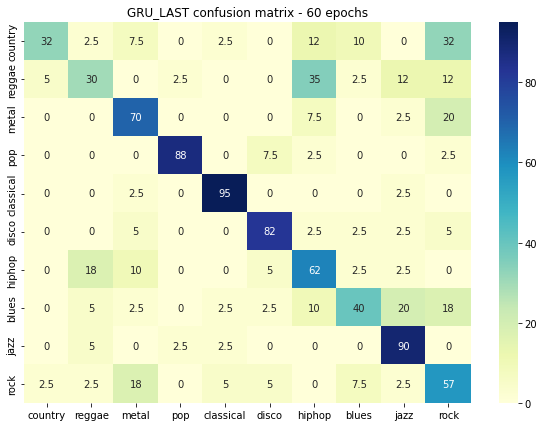

In [18]:
trainer_2.plot_confusion_matrix(test_dataloader, 'GRU_LAST confusion matrix - 60 epochs')

In [19]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.81      0.33      0.46        40
      reggae       0.48      0.30      0.37        40
       metal       0.61      0.70      0.65        40
         pop       0.95      0.88      0.91        40
   classical       0.88      0.95      0.92        40
       disco       0.80      0.82      0.81        40
      hiphop       0.47      0.62      0.54        40
       blues       0.62      0.40      0.48        40
        jazz       0.67      0.90      0.77        40
        rock       0.39      0.57      0.46        40

    accuracy                           0.65       400
   macro avg       0.67      0.65      0.64       400
weighted avg       0.67      0.65      0.64       400

